<a href="https://colab.research.google.com/github/Aashrit77/Python/blob/main/AsterDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
aster = pd.read_csv("/content/540975.csv")

In [5]:
aster.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,01-01-2021,166.75,168.0,164.50,167.3,166.191744,5596,275,930009,3854,68.87,3.50,0.55,NaN,NaN,NaN
1,31-12-2020,168.00,168.0,165.40,166.0,167.108338,11178,245,1867937,8285,74.12,2.60,-2.00,NaN,NaN,NaN
2,30-12-2020,165.50,167.6,163.35,167.0,165.865082,3491,218,579035,2183,62.53,4.25,1.50,NaN,NaN,NaN
3,29-12-2020,166.00,166.9,163.05,164.3,165.278321,5932,170,980431,3908,65.88,3.85,-1.70,NaN,NaN,NaN
4,28-12-2020,165.20,168.6,165.20,165.5,166.132475,9398,403,1561313,5469,58.19,3.40,0.30,NaN,NaN,01-Jan-21


In [6]:
aster = aster[["Date","Close Price"]]

In [7]:
aster

,Date,Close Price
0,01-01-2021,167.30
1,31-12-2020,166.00
2,30-12-2020,167.00
3,29-12-2020,164.30
4,28-12-2020,165.50
...,...,...
701,05-03-2018,169.55
702,01-03-2018,172.40
703,28-02-2018,172.65
704,27-02-2018,175.15


In [8]:
aster = aster.set_index(pd.DatetimeIndex(aster["Date"]))

In [9]:
aster

,Date,Close Price
Date,,
2021-01-01,01-01-2021,167.30
2020-12-31,31-12-2020,166.00
2020-12-30,30-12-2020,167.00
2020-12-29,29-12-2020,164.30
2020-12-28,28-12-2020,165.50
...,...,...
2018-05-03,05-03-2018,169.55
2018-01-03,01-03-2018,172.40
2018-02-28,28-02-2018,172.65


Text(0, 0.5, 'Close')

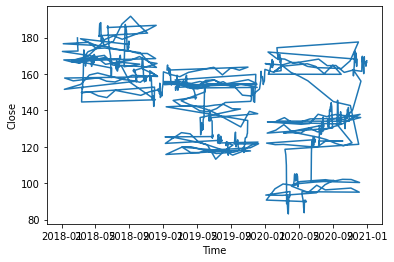

In [11]:
plt.plot(aster["Close Price"])
plt.xlabel("Time")
plt.ylabel("Close")

In [13]:
aster["Gain"] = aster["Close Price"].pct_change(periods=1)

In [14]:
aster

,Date,Close Price,Gain
Date,,,
2021-01-01,01-01-2021,167.30,NaN
2020-12-31,31-12-2020,166.00,-0.007770
2020-12-30,30-12-2020,167.00,0.006024
2020-12-29,29-12-2020,164.30,-0.016168
2020-12-28,28-12-2020,165.50,0.007304
...,...,...,...
2018-05-03,05-03-2018,169.55,-0.004112
2018-01-03,01-03-2018,172.40,0.016809
2018-02-28,28-02-2018,172.65,0.001450


In [15]:
aster.dropna()

,Date,Close Price,Gain
Date,,,
2020-12-31,31-12-2020,166.00,-0.007770
2020-12-30,30-12-2020,167.00,0.006024
2020-12-29,29-12-2020,164.30,-0.016168
2020-12-28,28-12-2020,165.50,0.007304
2020-12-24,24-12-2020,166.15,0.003927
...,...,...,...
2018-05-03,05-03-2018,169.55,-0.004112
2018-01-03,01-03-2018,172.40,0.016809
2018-02-28,28-02-2018,172.65,0.001450


Text(0, 0.5, 'Gain')

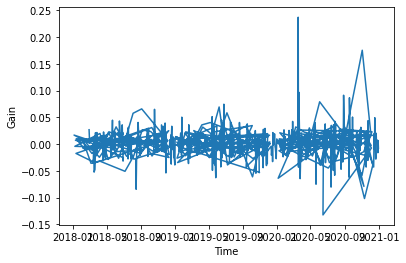

In [16]:
plt.plot(aster.Gain)
plt.xlabel("Time")
plt.ylabel("Gain")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

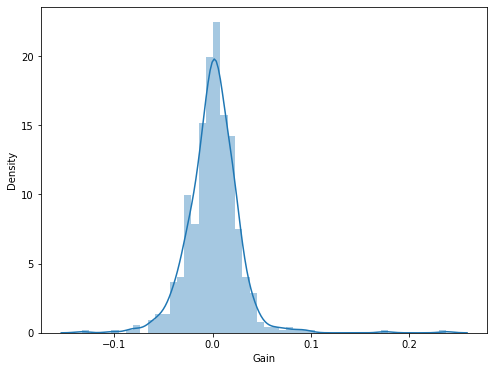

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(aster.Gain)
plt.xlabel("Gain")
plt.ylabel("Density")

In [18]:
from scipy import stats 
1-stats.norm.cdf(0.02,aster.Gain.mean(),aster.Gain.std())

0.22923162681953957

In [19]:
stats.norm.cdf(-0.02,aster.Gain.mean(),aster.Gain.std())

0.21914260975931504

In [21]:
stats.norm.interval(0.80,aster.Gain.mean(),aster.Gain.std())

(-0.03335888799273137, 0.034248121540806295)